<a href="https://colab.research.google.com/github/plaban1981/Hugging_Face_transformers_topics/blob/main/Running_MPT_30B_on_CPU_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q ctransformers==0.2.10
!pip install -q transformers==4.30.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 35.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.5/268.5 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 47.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 87.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 55.0 MB/s eta 0:00:00


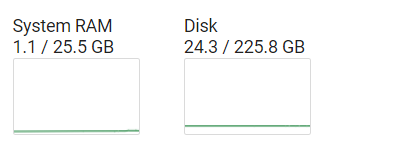

In [4]:
from huggingface_hub import hf_hub_download
from dataclasses import dataclass, asdict
from ctransformers import AutoModelForCausalLM, AutoConfig


In [3]:
import os
repo_id = "TheBloke/mpt-30B-chat-GGML"
model_filename = "mpt-30b-chat.ggmlv0.q4_1.bin"
destination_folder = "models"
#
local_path = os.path.abspath(destination_folder)
#
hf_hub_download(
        repo_id=repo_id,
        filename=model_filename,
        local_dir=local_path,
        local_dir_use_symlinks=True
    )


'/content/models/mpt-30b-chat.ggmlv0.q4_1.bin'

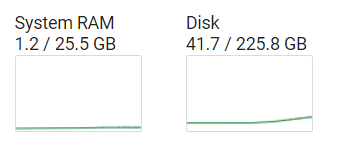

In [5]:
config = AutoConfig.from_pretrained("mosaicml/mpt-30b-chat", context_length=8192)
llm = AutoModelForCausalLM.from_pretrained(
        os.path.abspath("models/mpt-30b-chat.ggmlv0.q4_1.bin"),
        model_type="mpt",
        config=config,
    )

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

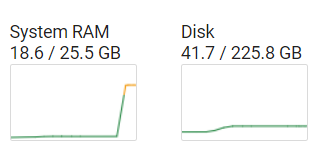

In [6]:
@dataclass
class GenerationConfig:
    temperature: float
    top_k: int
    top_p: float
    repetition_penalty: float
    max_new_tokens: int
    seed: int
    reset: bool
    stream: bool
    threads: int
    stop: list[str]

In [7]:
generation_config = GenerationConfig(
        temperature=0.2,
        top_k=0,
        top_p=0.9,
        repetition_penalty=1.0,
        max_new_tokens=512,  # adjust as needed
        seed=42,
        reset=False,  # reset history (cache)
        stream=True,  # streaming per word/token
        threads=int(os.cpu_count() / 2),  # adjust for your CPU
        stop=["<|im_end|>", "|<"],
    )

In [8]:
generation_config

GenerationConfig(temperature=0.2, top_k=0, top_p=0.9, repetition_penalty=1.0, max_new_tokens=512, seed=42, reset=False, stream=True, threads=2, stop=['<|im_end|>', '|<'])

In [9]:
user_prefix = "[user]: "
assistant_prefix = f"[assistant]:"

In [12]:
def format_prompt(system_prompt: str, user_prompt: str):
    """format prompt based on: https://huggingface.co/spaces/mosaicml/mpt-30b-chat/blob/main/app.py"""

    system_prompt = f"<|im_start|>system\n{system_prompt}<|im_end|>\n"
    user_prompt = f"<|im_start|>user\n{user_prompt}<|im_end|>\n"
    assistant_prompt = f"<|im_start|>assistant\n"

    return f"{system_prompt}{user_prompt}{assistant_prompt}"

In [10]:
def generate(
    llm: AutoModelForCausalLM,
    generation_config: GenerationConfig,
    system_prompt: str,
    user_prompt: str,
):
    """run model inference, will return a Generator if streaming is true"""

    return llm(
        format_prompt(
            system_prompt,
            user_prompt,
        ),
        **asdict(generation_config),
    )

In [14]:

system_prompt = "A conversation between a user and an LLM-based AI assistant named Local Assistant. Local Assistant gives helpful and honest answers."

user_prompt = input(user_prefix)
generator = generate(llm, generation_config, system_prompt, user_prompt.strip())
print(assistant_prefix, end=" ", flush=True)
sentence = []
for word in generator:
  sentence.append(word)
  #print(word, end="", flush=True)
  print("")

[user]: What is the capital of India ?
[assistant]: 




















































































































































































































































































































































































In [16]:
print("".join(sentence))

The capital of India is New Delhi. It is a city located in the northern part of India and serves as the country's political, cultural, and commercial center. New Delhi is home to many important government buildings, including the Indian Parliament and the Presidential Palace. It is also a bustling metropolis with a diverse population, a thriving economy, and a rich cultural heritage. The city is known for its wide boulevards, colonial-era architecture, and numerous monuments and museums that showcase the country's history and culture.
The foundation stone of New Delhi was laid by King George V in 1911, and the city was officially inaugurated as the capital of India in 1931. The city's design was based on a master plan prepared by British architects Edwin Lutyens and Herbert Baker, which included the construction of wide roads, grand buildings, and public spaces. The city's architecture is a mix of colonial, traditional Indian, and modern styles, with many iconic structures such as the 